Clase 3 - Segmentacion

Karen Geraldine Martinez Moreno
Cód.: 20221195001

In [1]:
!pip install git+https://github.com/IDEA-Research/GroundingDINO.git
!pip install -q -e .
!pip install supervision
!pip install git+https://github.com/IDEA-Research/GroundingDINO.git
!pip install kagglehub
!pip install segment-anything
!pip install segment-anything opencv-python matplotlib torch torchvision
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd GroundingDINO
!pip install -e .
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!wget https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P checkpoints


  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-req-build-yg6xtyzy
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-req-build-yg6xtyzy
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 856dde20aee659246248e20734ef9ba5214f5e44
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 376.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 17.6 MB/s eta 0:00:00
  Created wheel for groundingdino: filename=groundingdino-0.1.0-cp310-cp310-linux_x86_64.whl size=3045829 sha256=54160195433a40f552fd8fe5fe4050f8a672a0e76e5e6a4bb669b9a0613b354e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ip0gkq9u/wheels/6b/06/d7/b57f601a4df56af41d262a5b1b496359b13c323bf5ef0434b2
Successfully built groundingdino
ERROR: file:///content does not appear t

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dir = "/content/drive/MyDrive/Clase3_Segmentacion"

import os
if not os.path.exists(dir):
    os.makedirs(dir)

Mounted at /content/drive


In [3]:
import kagglehub
from shutil import copytree

path = kagglehub.dataset_download("andresperpinanreyes/perros-y-gatos-100-imagenes-entrenamiento")
target_dir = os.path.join(dir, "perros_y_gatos")
copytree(path, target_dir, dirs_exist_ok=True)
print(f"Dataset descargado en: {target_dir}")

100%|██████████| 8.14M/8.14M [00:00<00:00, 43.9MB/s]

Extracting files...


Dataset descargado en: /content/drive/MyDrive/Clase3_Segmentacion/perros_y_gatos


In [4]:
!pw
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd GroundingDINO/
%cd ..
!mkdir weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P weights

/bin/bash: line 1: pw: command not found
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 463 (delta 176), reused 137 (delta 137), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 16.48 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/content/GroundingDINO/GroundingDINO
/content/GroundingDINO


In [5]:
!pwd
!dir

#Se carga el modelo GroundingDINO y sus pesos
from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py",
     "weights/groundingdino_swint_ogc.pth")

/content/GroundingDINO
build	     Dockerfile        groundingdino	       LICENSE		 setup.py
checkpoints  docker_test.py    GroundingDINO	       README.md	 test.ipynb
demo	     environment.yaml  groundingdino.egg-info  requirements.txt  weights


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [6]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import os
from tqdm import tqdm
from PIL import Image

# Cargar el modelo
model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "weights/groundingdino_swint_ogc.pth")

# Parámetros para la detección
text = "Dog"  # Texto caption
BOX_THRESHOLD = 0.22  # Más cajas
TEXT_THRESHOLD = 0.10  # Más texto

# Directorios de entrada y salida
input_folder = "/content/drive/MyDrive/Clase3_Segmentacion/perros_y_gatos/perros"
output_folder = "/content/drive/MyDrive/Clase3_Segmentacion/deteccion"
os.makedirs(output_folder, exist_ok=True)

# Obtener todas las imágenes .jpg en el directorio de entrada
all_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg"))]

# Procesar imágenes
for filename in tqdm(all_files):
    if filename.endswith((".jpg")):
        image_path = os.path.join(input_folder, filename)
        try:
            # Cargar imagen y preprocesar
            image_source, image_tensor = load_image(image_path)

            # Realizar la predicción (ahora incluyendo 'caption')
            boxes, logits, phrases = predict(model=model,
                                              image=image_tensor,
                                              caption=text,  # Agregado el argumento 'caption'
                                              box_threshold=BOX_THRESHOLD,
                                              text_threshold=TEXT_THRESHOLD,
                                              device="cuda")  # Cambiar a 'cuda' si tienes GPU

            # Anotar la imagen
            annotated_frame = annotate(image_source=image_source,
                                       boxes=boxes,
                                       logits=logits,
                                       phrases=phrases)

            # Guardar la imagen anotada
            output_image_path = os.path.join(output_folder, filename)
            annotated_pil = Image.fromarray(annotated_frame)
            annotated_pil.save(output_image_path)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

print(f"Annotated images saved in: {output_folder}")

final text_encoder_type: bert-base-uncased


100%|██████████| 61/61 [00:25<00:00,  2.39it/s]

Annotated images saved in: /content/drive/MyDrive/Clase3_Segmentacion/deteccion


In [7]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import os
from tqdm import tqdm
from PIL import Image

# Cargar el modelo
model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "weights/groundingdino_swint_ogc.pth")

# Parámetros para la detección
text = "Dog"  # Este es el texto que se usará como caption
BOX_THRESHOLD = 0.22  # Ajustado para detectar más cajas
TEXT_THRESHOLD = 0.10  # Ajustado para detectar más texto

# Directorios de entrada y salida
input_folder = "/content/drive/MyDrive/Clase3_Segmentacion/perros_y_gatos/perros"
output_folder = "/content/drive/MyDrive/Clase3_Segmentacion/deteccion"
labels_folder = "/content/drive/MyDrive/Clase3_Segmentacion/etiquetasYOLO"  # Carpeta para etiquetas YOLO
os.makedirs(output_folder, exist_ok=True)
os.makedirs(labels_folder, exist_ok=True)

# Obtener todas las imágenes .jpg en el directorio de entrada
all_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg"))]

# Procesar imágenes
for filename in tqdm(all_files):
    if filename.endswith((".jpg")):
        image_path = os.path.join(input_folder, filename)
        try:
            # Cargar imagen y preprocesar
            image_source, image_tensor = load_image(image_path)

            # Realizar la predicción (ahora incluyendo 'caption')
            boxes, logits, phrases = predict(model=model,
                                              image=image_tensor,
                                              caption=text,
                                              box_threshold=BOX_THRESHOLD,
                                              text_threshold=TEXT_THRESHOLD,
                                              device="cuda")  # Cambiar a 'cuda' si tienes GPU

            # Anotar la imagen
            annotated_frame = annotate(image_source=image_source,
                                       boxes=boxes,
                                       logits=logits,
                                       phrases=phrases)

            # Guardar la imagen anotada
            output_image_path = os.path.join(output_folder, filename)
            annotated_pil = Image.fromarray(annotated_frame)
            annotated_pil.save(output_image_path)

            # Guardar etiquetas en formato YOLO inmediatamente después de la predicción
            height, width, _ = image_source.shape  # Obtener dimensiones de la imagen
            label_file_path = os.path.join(labels_folder, f"{os.path.splitext(filename)[0]}.txt")

            with open(label_file_path, 'w') as label_file:
                for box in boxes:
                    x_min, y_min, x_max, y_max = box.tolist()  # Convertir a lista

                    # Calcular el centro y dimensiones normalizadas
                    x_center = (x_min + x_max) / 2 / width
                    y_center = (y_min + y_max) / 2 / height
                    box_width = (x_max - x_min) / width
                    box_height = (y_max - y_min) / height

                    # Escribir la etiqueta (asumiendo que 'Building' es class_id 0)
                    label_file.write(f"0 {x_center} {y_center} {box_width} {box_height}\n")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

print(f"Annotated images saved in: {output_folder}")
print(f"YOLO labels saved in: {labels_folder}")

final text_encoder_type: bert-base-uncased


100%|██████████| 61/61 [00:24<00:00,  2.51it/s]

Annotated images saved in: /content/drive/MyDrive/Clase3_Segmentacion/deteccion
YOLO labels saved in: /content/drive/MyDrive/Clase3_Segmentacion/etiquetasYOLO


In [8]:
#DINO + SAM

import os
from tqdm import tqdm
from PIL import Image
import torch
from groundingdino.util.inference import load_model, load_image, predict, annotate
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import numpy as np

# Cargar el modelo GroundingDINO
dino_model = load_model(
    "/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py",
    "weights/groundingdino_swint_ogc.pth"
)

# Cargar el modelo SAM
sam_checkpoint = "/content/drive/MyDrive/Clase3_Segmentacion/sam_vit_h_4b8939.pth"  # Ruta al checkpoint de SAM
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to("cuda")
mask_generator = SamAutomaticMaskGenerator(sam)

# Parámetros para la detección
text = "Dog"
BOX_THRESHOLD = 0.22
TEXT_THRESHOLD = 0.10

# Directorios de entrada y salida
input_folder = "/content/drive/MyDrive/Clase3_Segmentacion/perros_y_gatos/perros"
output_folder = "/content/drive/MyDrive/Clase3_Segmentacion/deteccion"
labels_folder = "/content/drive/MyDrive/Clase3_Segmentacion/etiquetasYOLO"
segmentation_folder = "/content/drive/MyDrive/Clase3_Segmentacion/segmentacion"

os.makedirs(output_folder, exist_ok=True)
os.makedirs(labels_folder, exist_ok=True)
os.makedirs(segmentation_folder, exist_ok=True)

# Obtener todas las imágenes .jpg en el directorio de entrada
all_files = [f for f in os.listdir(input_folder) if f.endswith(".jpg")]

# Procesar imágenes
for filename in tqdm(all_files):
    image_path = os.path.join(input_folder, filename)
    try:
        # Cargar imagen y preprocesar
        image_source, image_tensor = load_image(image_path)

        # Realizar la predicción con GroundingDINO
        boxes, logits, phrases = predict(
            model=dino_model,
            image=image_tensor,
            caption=text,
            box_threshold=BOX_THRESHOLD,
            text_threshold=TEXT_THRESHOLD,
            device="cuda"
        )

        # Anotar la imagen
        annotated_frame = annotate(
            image_source=image_source,
            boxes=boxes,
            logits=logits,
            phrases=phrases
        )

        # Guardar la imagen anotada
        output_image_path = os.path.join(output_folder, filename)
        annotated_pil = Image.fromarray(annotated_frame)
        annotated_pil.save(output_image_path)

        # Guardar etiquetas en formato YOLO
        height, width, _ = image_source.shape
        label_file_path = os.path.join(labels_folder, f"{os.path.splitext(filename)[0]}.txt")

        with open(label_file_path, 'w') as label_file:
            for box in boxes:
                x_min, y_min, x_max, y_max = box.tolist()

                # Calcular el centro y dimensiones normalizadas
                x_center = (x_min + x_max) / 2 / width
                y_center = (y_min + y_max) / 2 / height
                box_width = (x_max - x_min) / width
                box_height = (y_max - y_min) / height

                # Escribir la etiqueta (class_id 0 para "Building")
                label_file.write(f"0 {x_center} {y_center} {box_width} {box_height}\n")

        # Generar segmentación con SAM
        masks = mask_generator.generate(image_source)

        # Guardar un máximo de 4 máscaras generadas
        for idx, mask in enumerate(masks[:3]):  # Tomar solo las primeras 4 máscaras
            mask_array = mask["segmentation"]
            mask_image = Image.fromarray((mask_array * 255).astype(np.uint8))
            mask_image.save(os.path.join(segmentation_folder, f"{os.path.splitext(filename)[0]}_mask_{idx}.png"))

    except Exception as e:
        print(f"Error processing {filename}: {e}")

print(f"Annotated images saved in: {output_folder}")
print(f"YOLO labels saved in: {labels_folder}")
print(f"Segmentations saved in: {segmentation_folder}")

final text_encoder_type: bert-base-uncased


100%|██████████| 61/61 [08:06<00:00,  7.97s/it]

Annotated images saved in: /content/drive/MyDrive/Clase3_Segmentacion/deteccion
YOLO labels saved in: /content/drive/MyDrive/Clase3_Segmentacion/etiquetasYOLO
Segmentations saved in: /content/drive/MyDrive/Clase3_Segmentacion/segmentacion


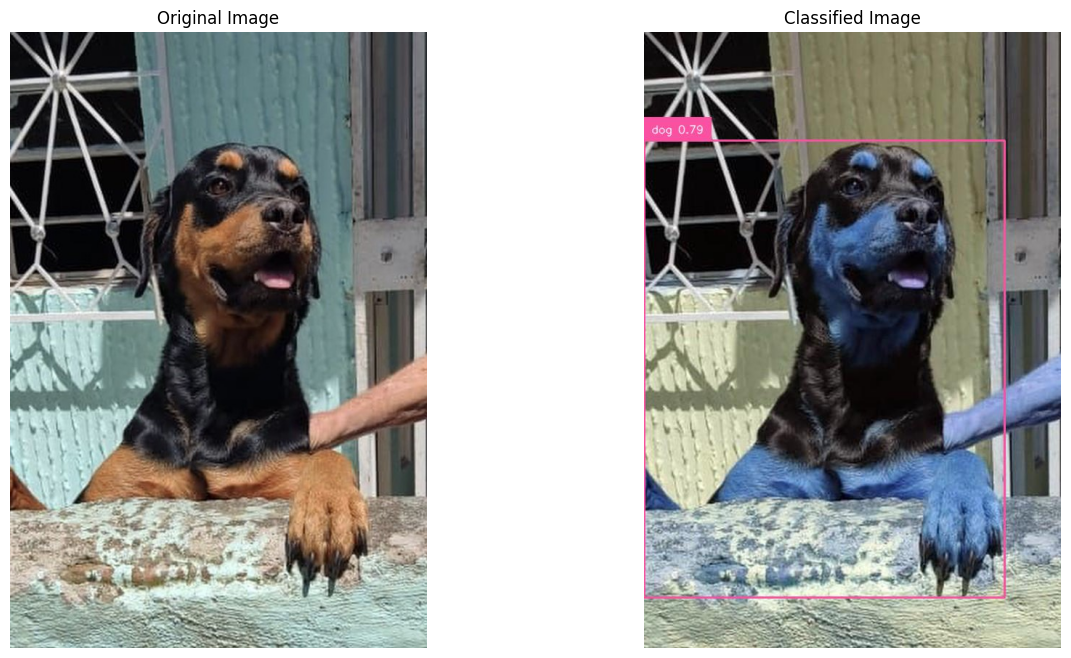

YOLO labels for /content/drive/MyDrive/Clase3_Segmentacion/perros_y_gatos/perros/perro (29).jpg:
0 0.001129314225517499 0.0007600624746871445 0.000753394039250417 0.00023018821792782478



In [11]:
# Imagen original, clasificada y YOLO


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_image_path = "/content/drive/MyDrive/Clase3_Segmentacion/perros_y_gatos/perros/perro (29).jpg"
classified_image_path = "/content/drive/MyDrive/Clase3_Segmentacion/deteccion/perro (29).jpg"


def display_images(original_path, classified_path):
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    # Original Image
    img_original = mpimg.imread(original_path)
    axes[0].imshow(img_original)
    axes[0].set_title("Original Image")
    axes[0].axis('off')


    # Classified Image
    img_classified = mpimg.imread(classified_path)
    axes[1].imshow(img_classified)
    axes[1].set_title("Classified Image")
    axes[1].axis('off')



    plt.show()


# Display images
display_images(original_image_path, classified_image_path)


yolo_label_path = "/content/drive/MyDrive/Clase3_Segmentacion/etiquetasYOLO/perro (29).txt"
try:
  with open(yolo_label_path, 'r') as f:
      print(f"YOLO labels for {original_image_path}:")
      print(f.read())
except FileNotFoundError:
  print(f"YOLO label file not found at: {yolo_label_path}")

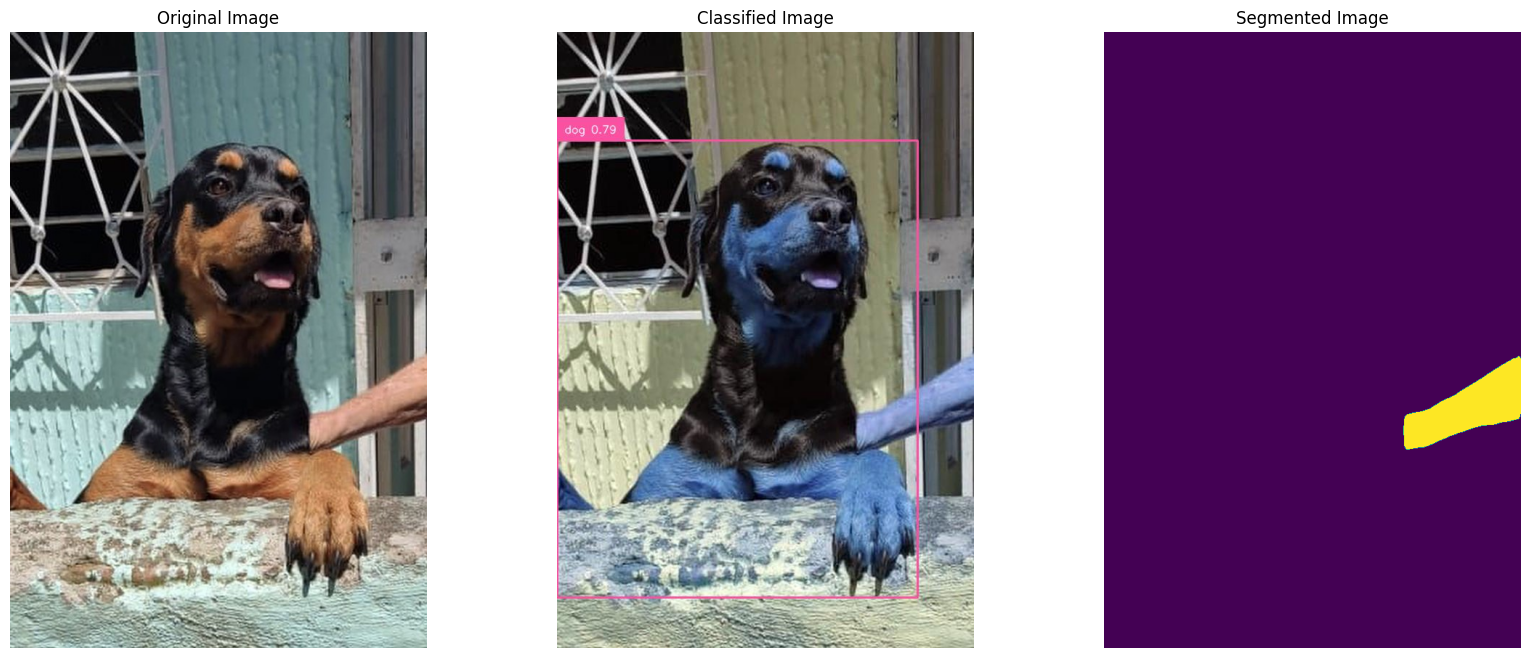

YOLO labels for /content/drive/MyDrive/Clase3_Segmentacion/perros_y_gatos/perros/perro (29).jpg:
0 0.001129314225517499 0.0007600624746871445 0.000753394039250417 0.00023018821792782478



In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Rutas de las imágenes
original_image_path = "/content/drive/MyDrive/Clase3_Segmentacion/perros_y_gatos/perros/perro (29).jpg"
classified_image_path = "/content/drive/MyDrive/Clase3_Segmentacion/deteccion/perro (29).jpg"
segment_image_path = "/content/drive/MyDrive/Clase3_Segmentacion/segmentacion/perro (29)_mask_2.png"

# Función para mostrar imágenes lado a lado
def display_images(original_path, classified_path, segment_path):
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # Tres columnas

    # Imagen original
    img_original = mpimg.imread(original_path)
    axes[0].imshow(img_original)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Imagen clasificada
    img_classified = mpimg.imread(classified_path)
    axes[1].imshow(img_classified)
    axes[1].set_title("Classified Image")
    axes[1].axis('off')

    # Imagen segmentada
    img_segmented = mpimg.imread(segment_path)
    axes[2].imshow(img_segmented)
    axes[2].set_title("Segmented Image")
    axes[2].axis('off')

    plt.show()

# Llamar a la función con las tres imágenes
display_images(original_image_path, classified_image_path, segment_image_path)

# Mostrar etiquetas YOLO
yolo_label_path = "/content/drive/MyDrive/Clase3_Segmentacion/etiquetasYOLO/perro (29).txt"
try:
    with open(yolo_label_path, 'r') as f:
        print(f"YOLO labels for {original_image_path}:")
        print(f.read())
except FileNotFoundError:
    print(f"YOLO label file not found at: {yolo_label_path}")
